# Вариационное счисление

In [9]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

EPS = 10e-6

## Задача 1. Вариационное исчисление

In [6]:
# Задаём дискретное время
num_of_fractions = 51   # Количество делений на дискретной шкале времени
t = np.linspace(0, 2, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0]    # Рассчитываем шаг шкалы

$$\int_0^2 y^2(t) + y'^2(t)dt  $$

In [28]:
# Задаём оптимизируемый функционал в дискретном времени
def f(y):
    return np.sum(y[1:] ** 2 + ((y[1:] - y[:-1]) / dt) ** 2)

1. Суммирование так как суммируем траекторию функционала, интеграл в континиуме - сумма в дискретном времени 
2. $\frac{y(t+1)-y(t)}{dt}$ - дискретная впередсмотрящая производная функционала 
3. $\frac{y(t)-y(t-1)}{dt}$ - дискретная назадсмотрящая производная функционала 

In [24]:
# Начальное значение y
y0 = [0.2 for x in range(0, num_of_fractions)]     

# Задаем ограничения на y. У нас y(0)=0 и y(2)=1
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (0.0 - EPS, 0.0 + EPS), (1.0 - EPS, 1.0 + EPS)

In [25]:
# Минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

In [26]:
# Определим функцию, возвращающую аналитическое решение. 
#Напомню, что y = (e^t - e^(-t))/(e^2 - e^(-2))
def f_analytical(t):
    return [(math.exp(elem) - math.exp(-elem))/(math.exp(2) - math.exp(-2)) for elem in t]

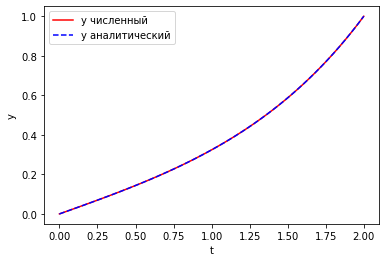

In [27]:
# Построим график и убедимся, что численное и аналитическое решения совпали
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

## Задача 2

In [68]:
num_of_fractions = 41
t = np.linspace(0, 1, num_of_fractions)
dt = t[1] - t[0]

In [69]:
def f(y):
    return np.sum(y[1:] ** 2 + (t[1:] ** 2) * (((y[1:] - y[:-1]) / dt) ** 2), axis=0)


y0 = [1.5 for x in range(0, num_of_fractions)]
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1.0 - EPS, 1.0 + EPS), (2.0 - EPS, 2.0 + EPS)

# bounds[20] = (5.0, 6.0)


In [70]:
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

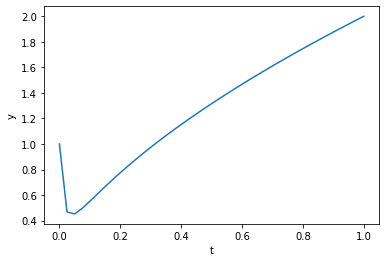

In [71]:
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()


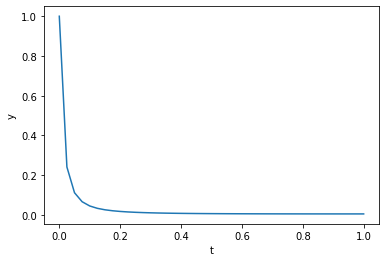

In [72]:

# Откинем правую границу

bounds2 = [(None, None) for x in range(0, num_of_fractions)]
bounds2[0] = (1.0 - EPS, 1.0 + EPS)

res2 = minimize(f, y0, method='l-bfgs-b', bounds=bounds2)

plt.plot(t, res2.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()


## Задача 3

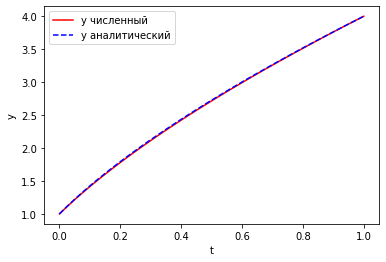

In [73]:
num_of_fractions = 41
t = np.linspace(0, 1, num_of_fractions)
dt = t[1] - t[0]


def f(y):
    return np.sum(y[1:] * (((y[1:] - y[:-1]) / dt) ** 2), axis=0)


y0 = [.5 for x in range(0, num_of_fractions)]
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1.0 - EPS, 1.0 + EPS), (4.0 - EPS, 4.0 + EPS)

res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)


def f_analytical(t):
    return [(7 * elem + 1) ** (2 / 3) for elem in t]


# Построим график и убедимся, что численное и аналитическое решения совпали
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()


## Задача 4

In [74]:
num_of_fractions = 41
t = np.linspace(0, 1, num_of_fractions)
dt = t[1] - t[0]


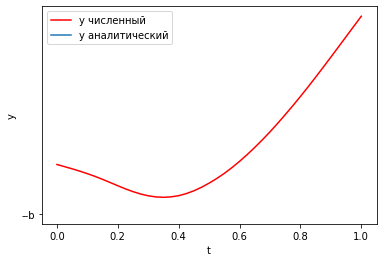

In [75]:

def f(y):
  dy = (y[1:] - y[:-1]) / dt
  d2y = (dy[1:] - dy[:-1]) / dt
  return np.sum(y[2:] + d2y**2, axis = 0)

y0 = [.5 for x in range(0, num_of_fractions)]
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1.0 - EPS, 1.0 + EPS), (4.0 - EPS, 4.0 + EPS)


res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

# Построим график и убедимся, что численное и аналитическое решения совпали
plt.plot(t, res.x, 'r', '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()